In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format='retina'

Tile.Size: doesn't matter

---
Match.Score

In [23]:
score_result = pd.read_csv('./result/RESULTS_NSTEVENS_CumCondCount=89839_2024-01-16.csv')
score_result.columns = ['TileSize','MatchScore','PrevLength','PrevType','BrowseTime']

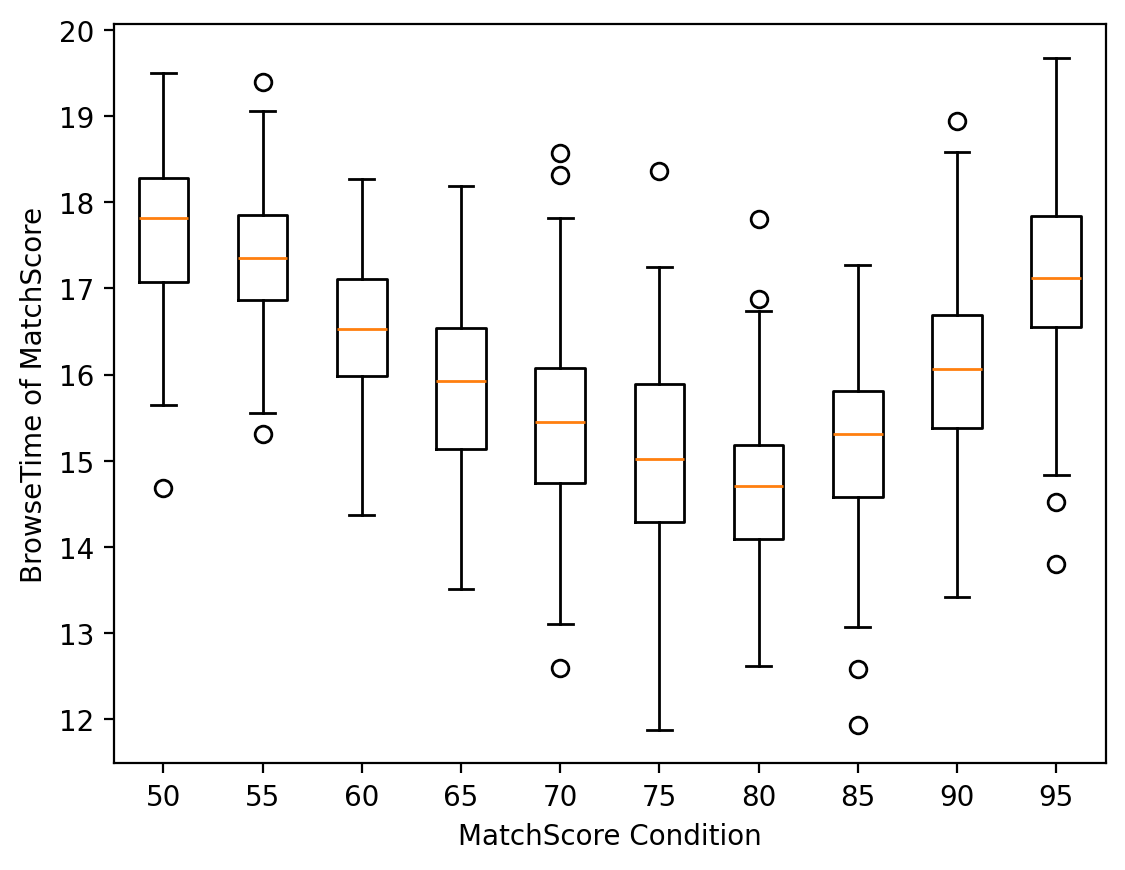

In [25]:
y = []
for i in range(50,100,5):
    y1 = score_result[score_result["MatchScore"]==i]["BrowseTime"]
    y.append(y1)

plt.boxplot(y, labels = range(50,100,5));
plt.ylabel("BrowseTime of MatchScore");
plt.xlabel("MatchScore Condition");

In [26]:
import statsmodels.formula.api as smf

model = smf.ols('BrowseTime ~ C(MatchScore)', data = score_result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.39e-161
Time:                        22:38:19   Log-Likelihood:                -1552.7
No. Observations:                1100   AIC:                             3127.
Df Residuals:                    1089   BIC:                             3182.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.6926      0.100    177.345      0.000      17.497      17.888
C(MatchScore)[T.55]    -0.3394      0.141     -2.406      0.016      -0.616      -0.063
C(MatchScore)[T.60]    -1.1992      0.141     -8.499      0.000      -1.476      -0.922
C(MatchScore)[T.65]    -1.8063      0.141    -12.803      0.000      -2.083      -1.530
C(MatchScore)[T.70]    -2.2337      0.141    -15.832      0.000      -2.511      -1.957
C(MatchScore)[T.75]    -2.5832      0.141    -18.310      0.000      -2.860      -2.306
C(MatchScore)[T.80]    -2.9368      0.141    -20.816      0.000      -3.214      -2.660
C(MatchScore)[T.85]    -2.5101      0.141    -17.791      0.000      -2.787      -2.233
C(MatchScore)[T.90]    -1.6227      0.141    -11.502      0.000      -1.900      -1.346
C(MatchScore)[T.95]    -0.5502      0.141     -3.900      0.000      -0.827      -0.273
C(MatchScore)[T.97]    -0.1321      0.141     -0.936      0.349      -0.409       0.145
==============================================================================
Omnibus:                        3.369   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.446
Skew:                          -0.077   Prob(JB):                        0.179
Kurtosis:                       3.227   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

default is 95
- h0: u80 >= u85 vs. ha: u80 < u85

In [27]:
cond1 = score_result[score_result["MatchScore"]==80]["BrowseTime"]
cond2 = score_result[score_result["MatchScore"]==85]["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)

t = 0.8943509911396669


In [28]:
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pv)

p-value = 0.5796185203120481


In [30]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -2.9906814507991415
p-value = 0.0015684658350285275


- h0: u80 >= u75 vs. ha: u80 < u75

In [31]:
cond1 = score_result[score_result["MatchScore"]==80]["BrowseTime"]
cond2 = score_result[score_result["MatchScore"]==75]["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)

t = 0.8366210992796924


In [32]:
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pv)

p-value = 0.3763579880674611


In [33]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -2.4343868918309606
p-value = 0.007901816969854418


---
Prev.Length

In [113]:
length_result = pd.read_csv('./result/length_test.csv')
length_result.columns = ['TileSize','MatchScore','PrevLength','PrevType','BrowseTime']

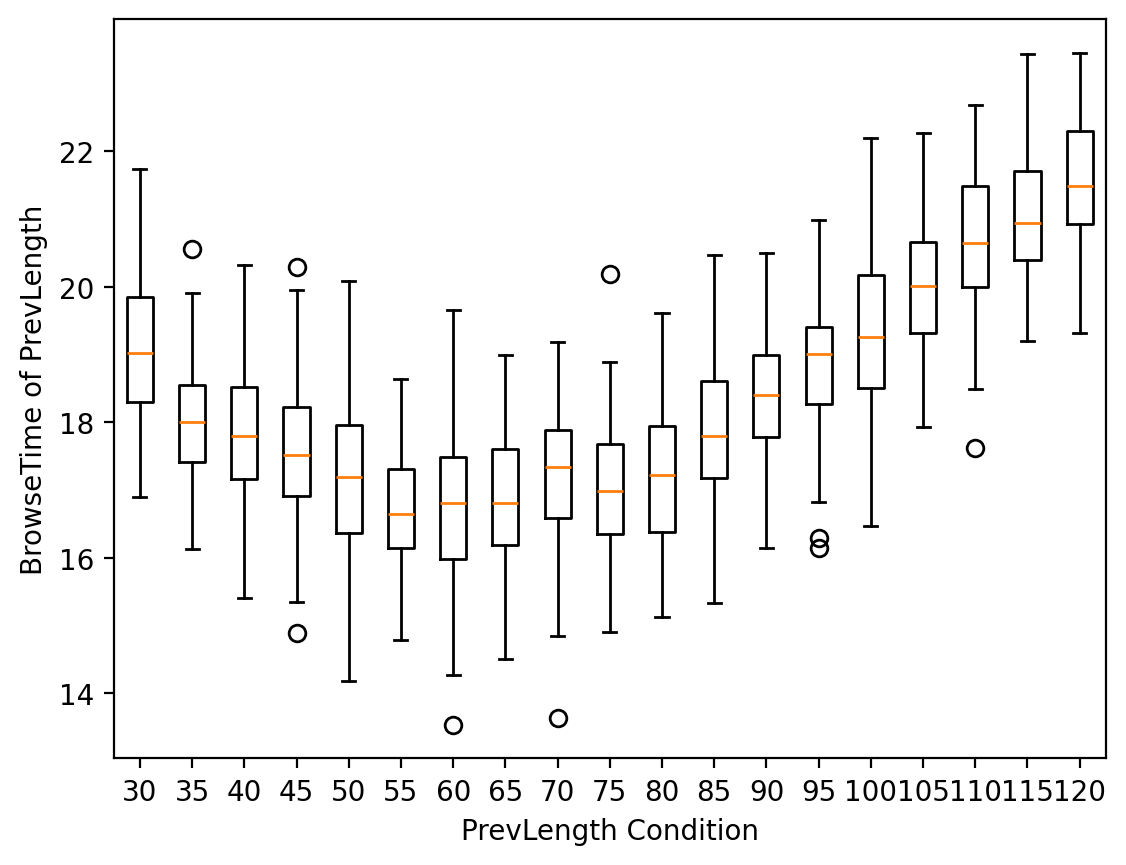

In [114]:
y = []
for i in range(30,125,5):
    y1 = length_result[length_result["PrevLength"]==i]["BrowseTime"]
    y.append(y1)

plt.boxplot(y, labels = range(30,125,5));
plt.ylabel("BrowseTime of PrevLength");
plt.xlabel("PrevLength Condition");

In [40]:
model = smf.ols('BrowseTime ~ C(PrevLength)', data = length_result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     231.2
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:47:01   Log-Likelihood:                -2702.7
No. Observations:                1900   AIC:                             5443.
Df Residuals:                    1881   BIC:                             5549.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               19.0706      0.101    189.081      0.000      18.873      19.268
C(PrevLength)[T.35]     -1.1196      0.143     -7.849      0.000      -1.399      -0.840
C(PrevLength)[T.40]     -1.2002      0.143     -8.414      0.000      -1.480      -0.920
C(PrevLength)[T.45]     -1.5320      0.143    -10.740      0.000      -1.812      -1.252
C(PrevLength)[T.50]     -1.8974      0.143    -13.302      0.000      -2.177      -1.618
C(PrevLength)[T.55]     -2.3527      0.143    -16.494      0.000      -2.632      -2.073
C(PrevLength)[T.60]     -2.2615      0.143    -15.855      0.000      -2.541      -1.982
C(PrevLength)[T.65]     -2.2630      0.143    -15.865      0.000      -2.543      -1.983
C(PrevLength)[T.70]     -1.8833      0.143    -13.203      0.000      -2.163      -1.604
C(PrevLength)[T.75]     -2.0328      0.143    -14.252      0.000      -2.313      -1.753
C(PrevLength)[T.80]     -1.9242      0.143    -13.491      0.000      -2.204      -1.645
C(PrevLength)[T.85]     -1.2430      0.143     -8.714      0.000      -1.523      -0.963
C(PrevLength)[T.90]     -0.7101      0.143     -4.979      0.000      -0.990      -0.430
C(PrevLength)[T.95]     -0.2252      0.143     -1.579      0.115      -0.505       0.055
C(PrevLength)[T.100]     0.2402      0.143      1.684      0.092      -0.040       0.520
C(PrevLength)[T.105]     1.0150      0.143      7.116      0.000       0.735       1.295
C(PrevLength)[T.110]     1.5971      0.143     11.197      0.000       1.317       1.877
C(PrevLength)[T.115]     2.0071      0.143     14.071      0.000       1.727       2.287
C(PrevLength)[T.120]     2.4717      0.143     17.328      0.000       2.192       2.751
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.585
Skew:                          -0.057   Prob(JB):                        0.275
Kurtosis:                       2.861   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from above : means are diff


- h0: u55 >= u60 vs. u55 < u60

In [87]:
# f-test for var
cond1 = length_result[length_result["PrevLength"]==55]["BrowseTime"]
cond2 = length_result[length_result["PrevLength"]==60]["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pv)

t = 0.5575052889213497
p-value = 0.00398611649473235


In [88]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = False, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -0.6476000652863233
p-value = 0.2590271574054269


- h0: u55 = u60 vs. u55 != u60

In [90]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = False, alternative = 'two-sided')
print("t =", t)
print("p-value =", pv)

t = -0.6476000652863233
p-value = 0.5180543148108538


- h0: u55 >= u75 vs. u55 < u75

In [91]:
# f-test for var
cond1 = length_result[length_result["PrevLength"]==55]["BrowseTime"]
cond2 = length_result[length_result["PrevLength"]==75]["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pv)

t = 0.817387664904571
p-value = 0.31741612585037104


In [92]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -2.5469176297278597
p-value = 0.005813946007501849


wider range (10)

In [111]:
length_result2 = pd.read_csv('./result/length_test2.csv')
length_result2.columns = ['TileSize','MatchScore','PrevLength','PrevType','BrowseTime']

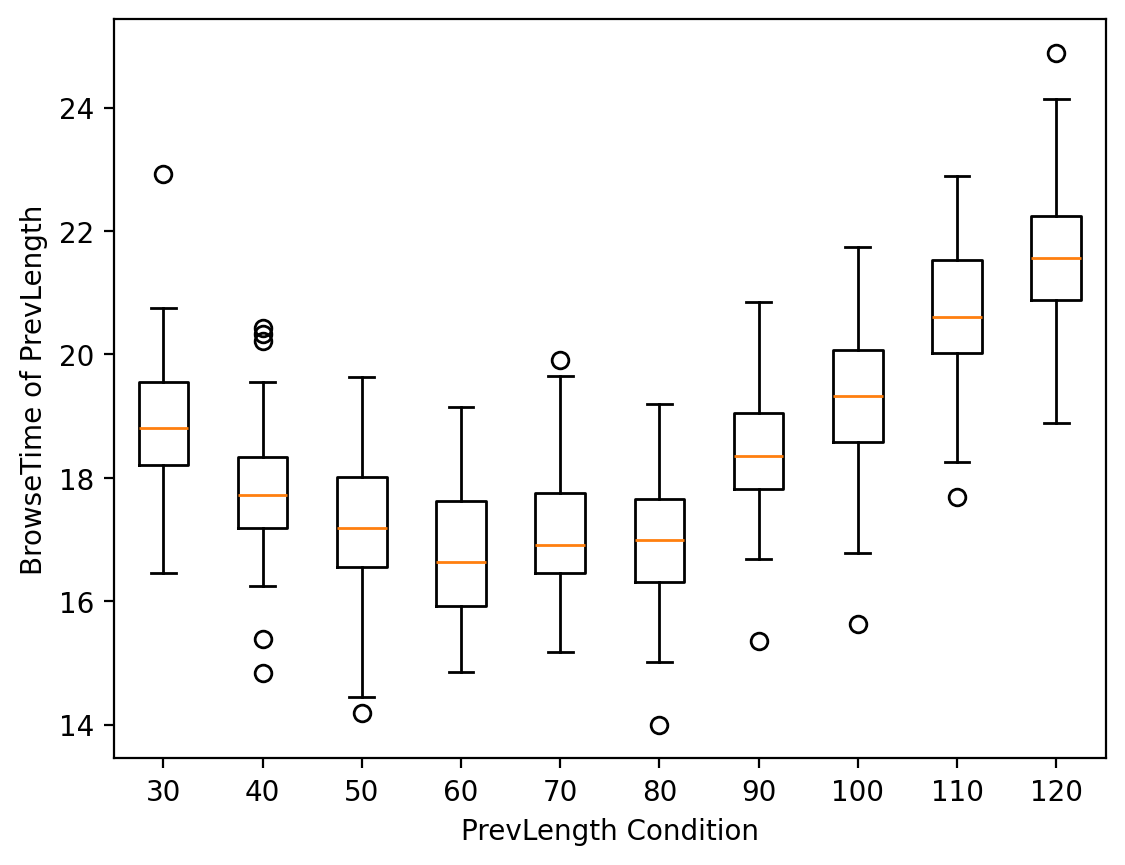

In [112]:
y = []
for i in range(30,125,10):
    y1 = length_result2[length_result2["PrevLength"]==i]["BrowseTime"]
    y.append(y1)

plt.boxplot(y, labels = range(30,125,10));
plt.ylabel("BrowseTime of PrevLength");
plt.xlabel("PrevLength Condition");

In [99]:
model = smf.ols('BrowseTime ~ C(PrevLength)', data = length_result2).fit()
# model.summary()

above model result: means are diff
- h0: u60 >= u70 vs. ha: u60 < u70

In [100]:
# f-test for var
cond1 = length_result2[length_result2["PrevLength"]==60]["BrowseTime"]
cond2 = length_result2[length_result2["PrevLength"]==70]["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pv)

t = 0.9296505676484861
p-value = 0.7173901627427397


In [101]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -2.471057300383247
p-value = 0.007158074154678823


- h0: u60 >= u50 vs. ha: u60 < u50

In [102]:
# f-test for var
cond1 = length_result2[length_result2["PrevLength"]==60]["BrowseTime"]
cond2 = length_result2[length_result2["PrevLength"]==50]["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pv)

t = 0.7497763286374927
p-value = 0.1536896134530803


In [103]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -3.364173942174576
p-value = 0.00046090007984127


- h0: u60 >= u80 vs. ha: u60 < u80

In [104]:
# f-test for var
cond1 = length_result2[length_result2["PrevLength"]==60]["BrowseTime"]
cond2 = length_result2[length_result2["PrevLength"]==80]["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=99, dfd=99) + 1 - stats.f.cdf(1/t, dfn=99, dfd=99)
print("p-value =", pv)

t = 1.0346054457721436
p-value = 1.1340595419711543


In [105]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -1.6636736140240942
p-value = 0.048879784976875555


---
Prev.Type

In [58]:
len_type = pd.read_csv('./result/len_type_test.csv')
len_type.columns = ['TileSize','MatchScore','PrevLength','PrevType','BrowseTime']

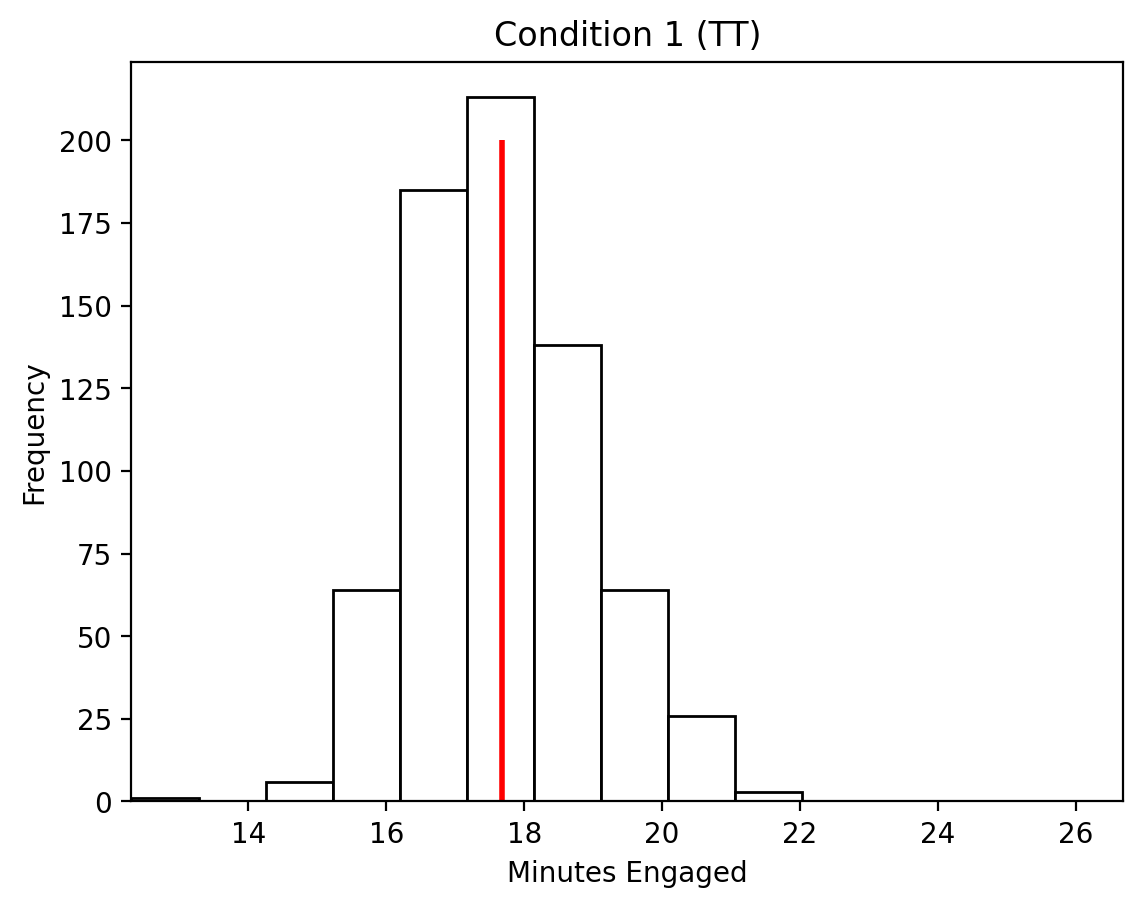

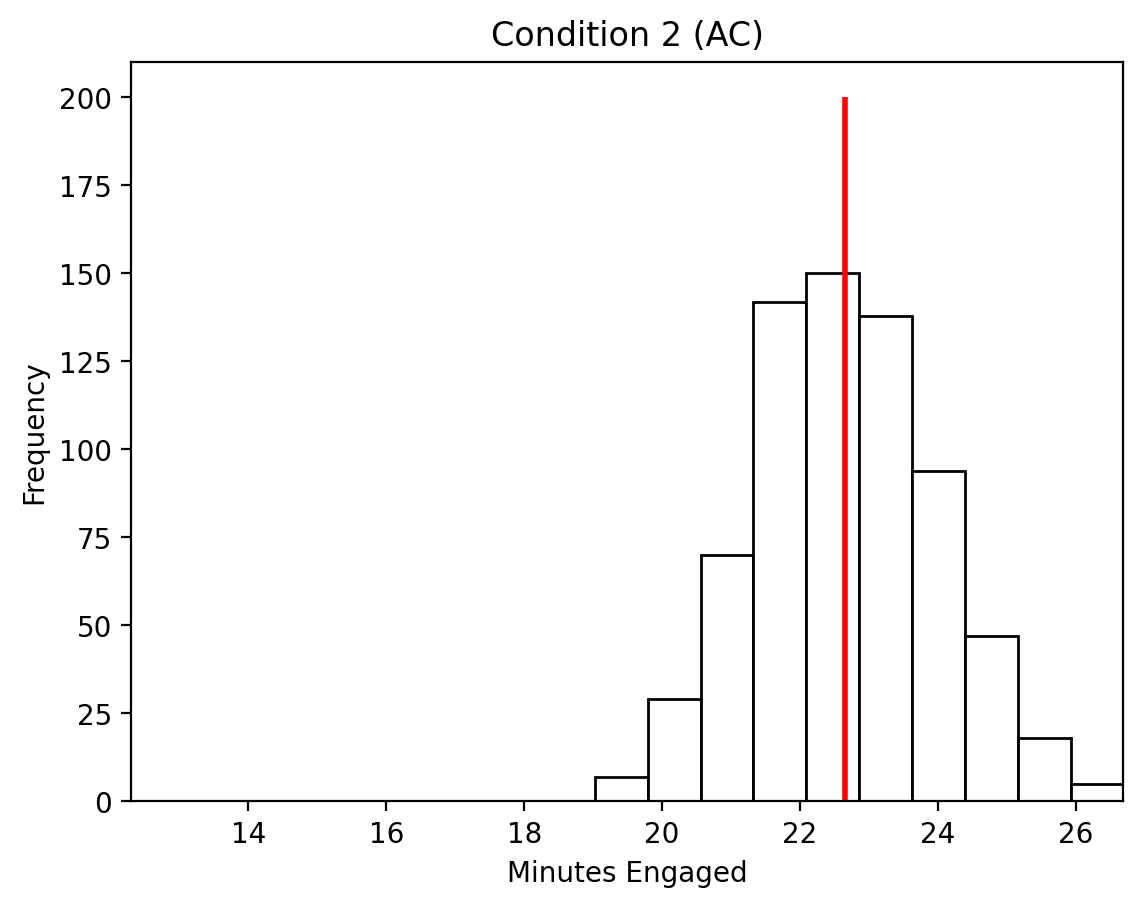

In [71]:
cond1 = len_type[len_type["PrevType"]=='TT']["BrowseTime"]
cond2 = len_type[len_type["PrevType"]=='AC']["BrowseTime"]
xmin = min(min(cond1), min(cond2))
xmax = max(max(cond1), max(cond2))
plt.figure()
plt.hist(cond1, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("Condition 1 (TT)")
plt.vlines(x = np.mean(cond1), ymin = 0, ymax = 200, color = "red", linewidth = 2)
plt.figure()
plt.hist(cond2, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("Condition 2 (AC)")
plt.vlines(x = np.mean(cond2), ymin = 0, ymax = 200, color = "red", linewidth = 2)

test for intersection

In [59]:
model = smf.ols('BrowseTime ~ C(PrevLength) * C(PrevType)', data = len_type).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     761.4
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:15:37   Log-Likelihood:                -1961.1
No. Observations:                1400   AIC:                             3950.
Df Residuals:                    1386   BIC:                             4024.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 22.8144      0.099    231.157      0.000      22.621      23.008
C(PrevLength)[T.50]                       -0.4447      0.140     -3.186      0.001      -0.719      -0.171
C(PrevLength)[T.60]                       -1.2194      0.140     -8.736      0.000      -1.493      -0.946
C(PrevLength)[T.70]                       -0.6638      0.140     -4.756      0.000      -0.938      -0.390
C(PrevLength)[T.80]                       -0.8635      0.140     -6.186      0.000      -1.137      -0.590
C(PrevLength)[T.90]                        0.5553      0.140      3.979      0.000       0.282       0.829
C(PrevLength)[T.100]                       1.5149      0.140     10.853      0.000       1.241       1.789
C(PrevType)[T.TT]                         -4.9525      0.140    -35.482      0.000      -5.226      -4.679
C(PrevLength)[T.50]:C(PrevType)[T.TT]     -0.2353      0.197     -1.192      0.233      -0.623       0.152
C(PrevLength)[T.60]:C(PrevType)[T.TT]      0.1885      0.197      0.955      0.340      -0.199       0.576
C(PrevLength)[T.70]:C(PrevType)[T.TT]     -0.1235      0.197     -0.625      0.532      -0.511       0.264
C(PrevLength)[T.80]:C(PrevType)[T.TT]      0.2263      0.197      1.146      0.252      -0.161       0.613
C(PrevLength)[T.90]:C(PrevType)[T.TT]     -0.0576      0.197     -0.292      0.770      -0.445       0.330
C(PrevLength)[T.100]:C(PrevType)[T.TT]    -0.2003      0.197     -1.015      0.310      -0.588       0.187
==============================================================================
Omnibus:                        1.874   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.884
Skew:                           0.003   Prob(JB):                        0.390
Kurtosis:                       3.180   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

test intersection for length and type

In [60]:
model_red1 = smf.ols('BrowseTime ~ C(PrevLength) + C(PrevType)', data = len_type).fit()
sm.stats.anova_lm(model_red1, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1392.0,1359.858373,0.0,NaN,NaN,NaN
1,1386.0,1350.109315,6.0,9.749058,1.668037,0.125216


it seems no intersection for type and length

test main effect of type

In [61]:
model_red2 = smf.ols('BrowseTime ~ C(PrevLength)', data = len_type).fit()
sm.stats.anova_lm(model_red2, model_red1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1393.0,10044.855186,0.0,NaN,NaN,NaN
1,1392.0,1359.858373,1.0,8684.996814,8890.275494,0.0


In [62]:
model_red3 = smf.ols('BrowseTime ~ C(PrevType)', data = len_type).fit()
sm.stats.anova_lm(model_red3, model_red1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1398.0,2307.279654,0.0,NaN,NaN,NaN
1,1392.0,1359.858373,6.0,947.421281,161.635757,6.435305e-156


the main effect of type and length are the both significant

test for type:
- f-test for var

In [63]:
cond1 = len_type[len_type["PrevType"]=='TT']["BrowseTime"]
cond2 = len_type[len_type["PrevType"]=='AC']["BrowseTime"]
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)

t = 0.8978215320836085


In [66]:
pv = stats.f.cdf(t, dfn=699, dfd=699) + 1 - stats.f.cdf(1/t, dfn=699, dfd=699)
print("p-value =", pv)

p-value = 0.1544536548513059


t-test for diff var:
- h0: uTT >= uAC
- ha: uTT < uAC

In [67]:
t, pv = stats.ttest_ind(cond1, cond2, equal_var = False, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -72.54179526090667
p-value = 0.0


For testing on NSTEVES:

- TileSize: doesn't matter

- PrevType: AC

- PrevLength: 55/60

- MatchScore: 80

more to do:

test the interaction for MatchScore with PrevType and PrevLength

---
MatchScore with PrevType

In [107]:
score_type = pd.read_csv('./result/score_type_test.csv')
score_type.columns = ['TileSize','MatchScore','PrevLength','PrevType','BrowseTime']

In [108]:
model = smf.ols('BrowseTime ~ C(MatchScore) * C(PrevType)', data = score_type).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     792.2
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:17:59   Log-Likelihood:                -1430.6
No. Observations:                1000   AIC:                             2881.
Df Residuals:                     990   BIC:                             2930.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                22.6969      0.102    223.212      0.000      22.497      22.896
C(MatchScore)[T.60]                      -1.0372      0.144     -7.212      0.000      -1.319      -0.755
C(MatchScore)[T.70]                      -2.0943      0.144    -14.564      0.000      -2.377      -1.812
C(MatchScore)[T.80]                      -2.7892      0.144    -19.396      0.000      -3.071      -2.507
C(MatchScore)[T.90]                      -1.7684      0.144    -12.298      0.000      -2.051      -1.486
C(PrevType)[T.TT]                        -5.1717      0.144    -35.964      0.000      -5.454      -4.889
C(MatchScore)[T.60]:C(PrevType)[T.TT]     0.0321      0.203      0.158      0.875      -0.367       0.431
C(MatchScore)[T.70]:C(PrevType)[T.TT]    -0.0493      0.203     -0.242      0.809      -0.448       0.350
C(MatchScore)[T.80]:C(PrevType)[T.TT]     0.1520      0.203      0.747      0.455      -0.247       0.551
C(MatchScore)[T.90]:C(PrevType)[T.TT]     0.2329      0.203      1.145      0.252      -0.166       0.632
==============================================================================
Omnibus:                        5.625   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.796
Skew:                           0.060   Prob(JB):                       0.0334
Kurtosis:                       3.385   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
model_red1 = smf.ols('BrowseTime ~ C(MatchScore) + C(PrevType)', data = score_type).fit()
sm.stats.anova_lm(model_red1, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,994.0,1026.301259,0.0,NaN,NaN,NaN
1,990.0,1023.612817,4.0,2.688442,0.65004,0.626934


some interaction in score and type

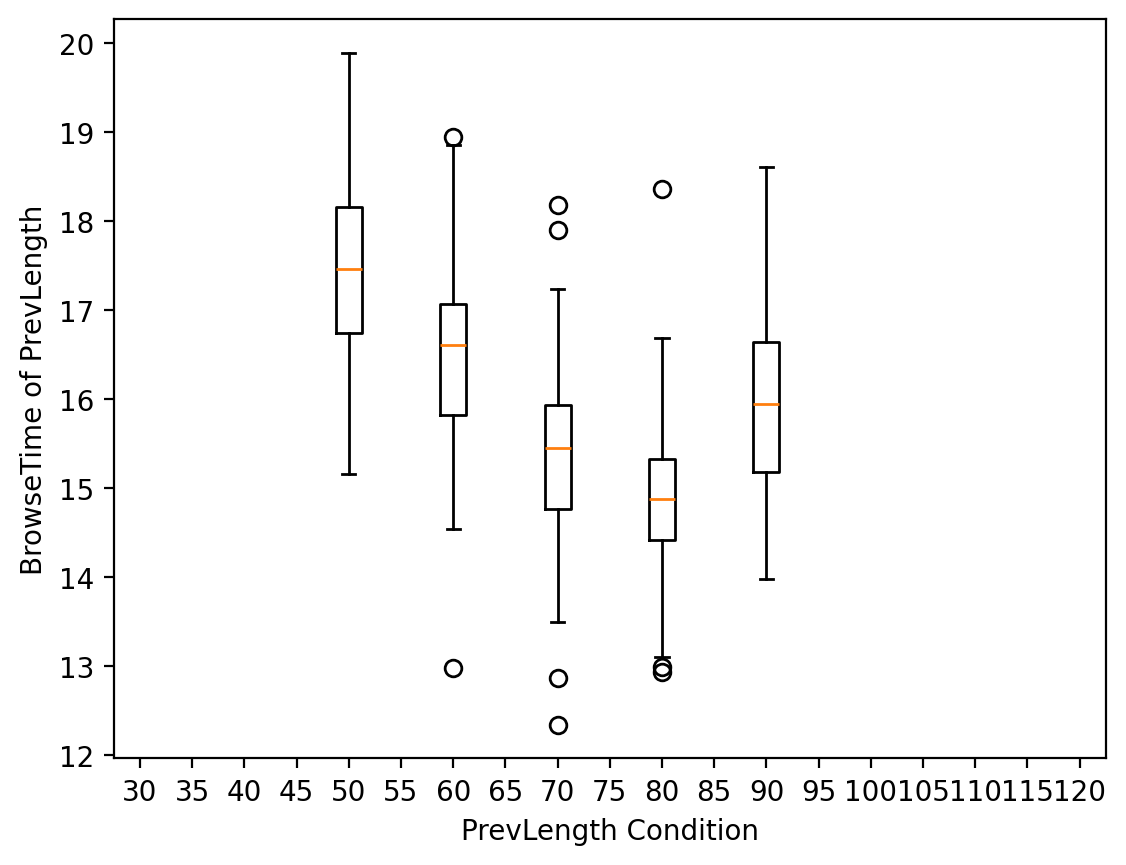

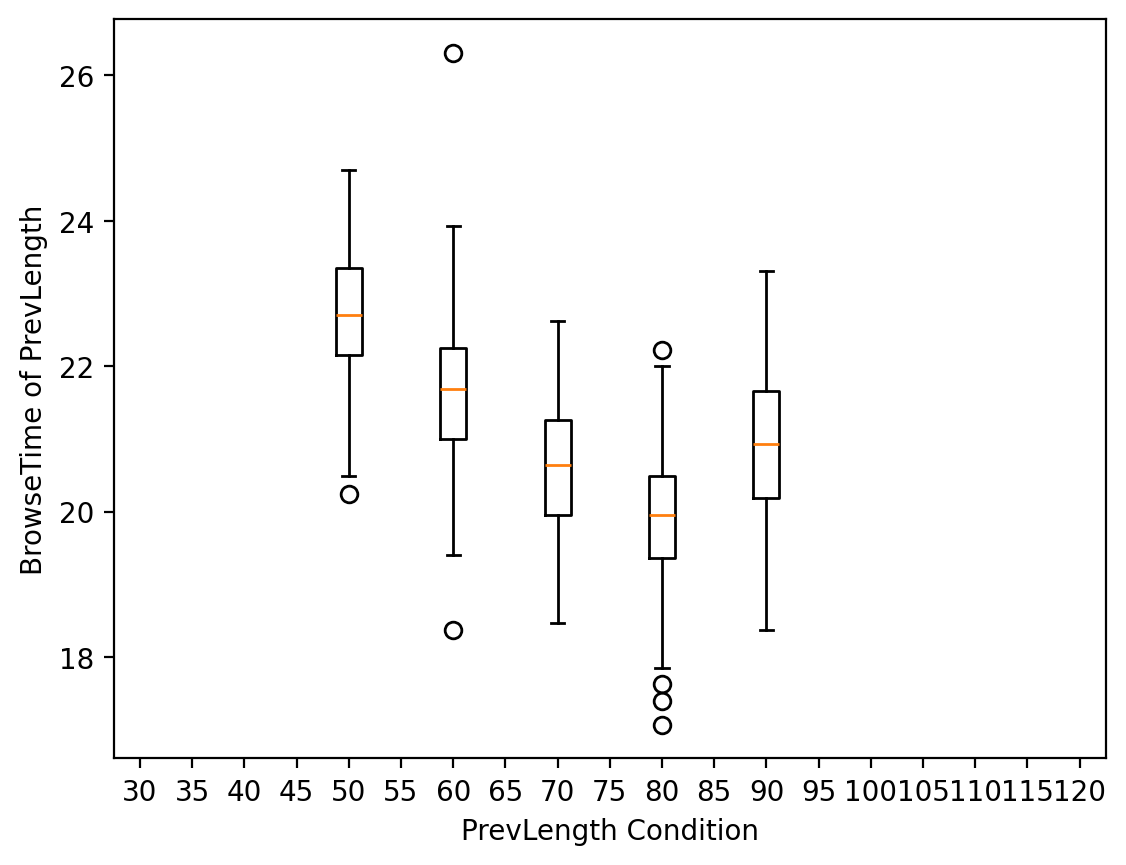

In [117]:
cond1 = score_type[score_type["PrevType"]=='TT']
y = []
for i in range(30,125,5):
    y1 = cond1[cond1["MatchScore"]==i]["BrowseTime"]
    y.append(y1)

plt.boxplot(y, labels = range(30,125,5));
plt.ylabel("BrowseTime of PrevLength");
plt.xlabel("PrevLength Condition");
plt.show()

cond2 = score_type[score_type["PrevType"]=='AC']
y = []
for i in range(30,125,5):
    y2 = cond2[cond2["MatchScore"]==i]["BrowseTime"]
    y.append(y2)

plt.boxplot(y, labels = range(30,125,5));
plt.ylabel("BrowseTime of PrevLength");
plt.xlabel("PrevLength Condition");

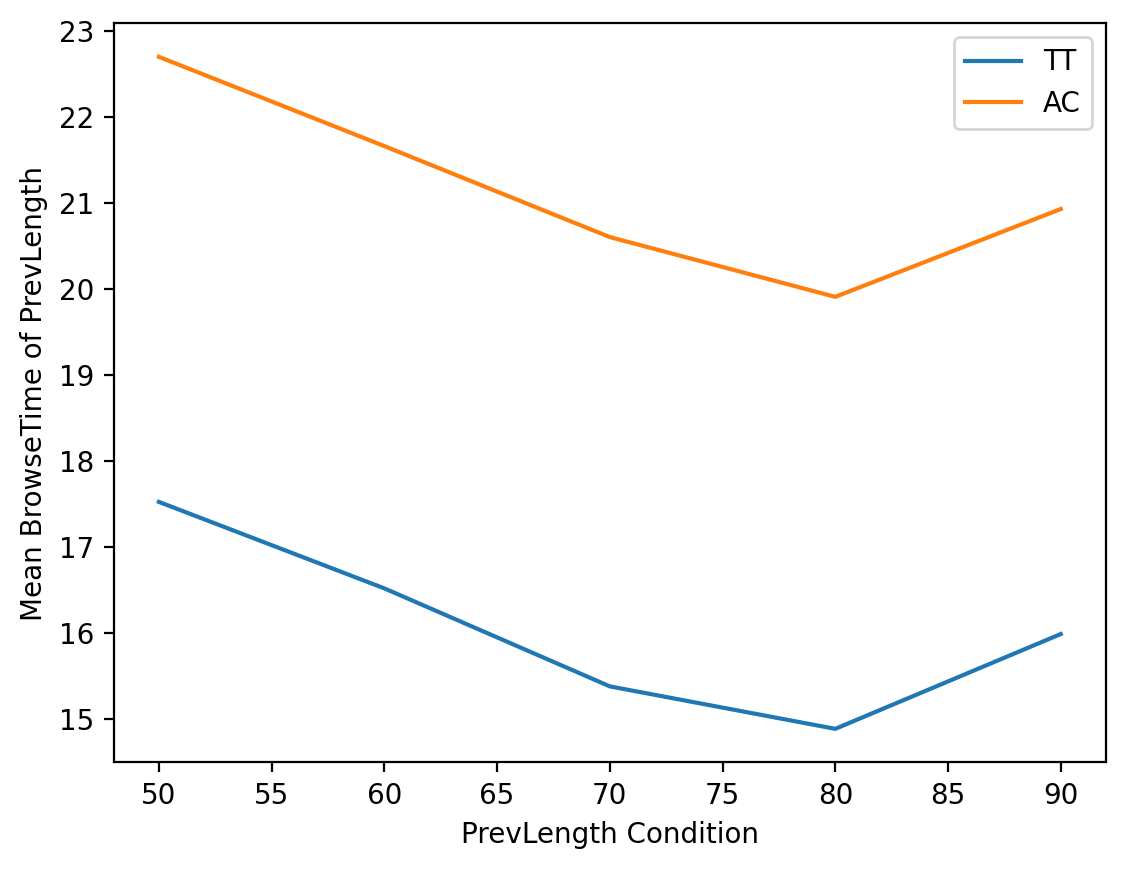

In [119]:
# Condition 1
cond1 = score_type[score_type["PrevType"] == 'TT']
y1_mean = [cond1[cond1["MatchScore"] == i]["BrowseTime"].mean() for i in range(50, 100, 10)]

# Condition 2
cond2 = score_type[score_type["PrevType"] == 'AC']
y2_mean = [cond2[cond2["MatchScore"] == i]["BrowseTime"].mean() for i in range(50, 100, 10)]

# Plotting
plt.plot(range(50, 100, 10), y1_mean, label='TT')
plt.plot(range(50, 100, 10), y2_mean, label='AC')
plt.xlabel("PrevLength Condition")
plt.ylabel("Mean BrowseTime of PrevLength")
plt.legend()
plt.show()

In [ ]:
for i in range(50, 100, 10):
    y_score = score_type[score_type["MatchScore"]==i]
    y_tt = y_score[y_score['PrevType']=='TT']
    y_ac = y_score[y_score['PrevType']=='AC']

 

---
MatchScore with PrevLength

In [121]:
score_len = pd.read_csv('./result/score_len_test.csv')
score_len.columns = ['TileSize','MatchScore','PrevLength','PrevType','BrowseTime']

In [123]:
model = smf.ols('BrowseTime ~ C(MatchScore) * C(PrevLength)', data = score_len).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     87.24
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          3.99e-119
Time:                        01:37:37   Log-Likelihood:                -1387.5
No. Observations:                1000   AIC:                             2795.
Df Residuals:                     990   BIC:                             2844.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  15.8838      0.097    163.091      0.000      15.693      16.075
C(MatchScore)[T.60]                        -0.3161      0.138     -2.295      0.022      -0.586      -0.046
C(MatchScore)[T.70]                        -1.2320      0.138     -8.945      0.000      -1.502      -0.962
C(MatchScore)[T.80]                        -1.4936      0.138    -10.844      0.000      -1.764      -1.223
C(MatchScore)[T.90]                        -0.5170      0.138     -3.753      0.000      -0.787      -0.247
C(PrevLength)[T.75]                         1.5620      0.138     11.341      0.000       1.292       1.832
C(MatchScore)[T.60]:C(PrevLength)[T.75]    -0.6344      0.195     -3.257      0.001      -1.017      -0.252
C(MatchScore)[T.70]:C(PrevLength)[T.75]    -0.7258      0.195     -3.726      0.000      -1.108      -0.344
C(MatchScore)[T.80]:C(PrevLength)[T.75]    -1.1466      0.195     -5.887      0.000      -1.529      -0.764
C(MatchScore)[T.90]:C(PrevLength)[T.75]    -1.0180      0.195     -5.226      0.000      -1.400      -0.636
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.339
Skew:                          -0.040   Prob(JB):                        0.844
Kurtosis:                       3.042   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model_red1 = smf.ols('BrowseTime ~ C(MatchScore) + C(PrevLength)', data = score_len).fit()
sm.stats.anova_lm(model_red1, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,994.0,978.806002,0.0,NaN,NaN,NaN
1,990.0,939.035190,4.0,39.770811,10.482329,2.554125e-08


no interaction for MatchScore and PrevLength

---
    MatchScore: 11 (from 50 to 90) (can cut down with wider range)

    Prevlength: 10 (from 30 to 120)

    Len_Type: 12

    Score_Len: 10

    Score_Type: 10


---
When we don't consider the inter

---
2k_test

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns

In [80]:
result_2k = pd.read_csv('./result/real_2k.csv')
result_2k.columns = ['PrevLength','MatchScore','TileSize','PrevType','BrowseTime']

In [4]:
result_2k

,TileSize,MatchScore,PrevLength,PrevType,BrowseTime
0,60,70,0.2,AC,17.692254
1,100,90,0.2,AC,23.372251
2,60,70,0.2,AC,16.143046
3,100,90,0.2,AC,22.154946
4,60,70,0.5,AC,17.352033
...,...,...,...,...,...
1595,100,90,0.2,TT,16.092323
1596,60,70,0.5,TT,13.305137
1597,100,90,0.5,TT,18.630773
1598,60,70,0.5,TT,11.724845


In [23]:
model = smf.ols('BrowseTime ~ C(TileSize) * C(MatchScore) * C(PrevLength) * C(PrevType)', data = result_2k).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     3652.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:44:20   Log-Likelihood:                -2214.7
No. Observations:                1600   AIC:                             4445.
Df Residuals:                    1592   BIC:                             4488.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                        17.0205      0.074    229.988      0.000      16.875      17.166
C(TileSize)[T.0.5]                                                                0.0844      0.097      0.871      0.384      -0.106       0.274
C(MatchScore)[T.90]                                                            2.764e+12   3.04e+12      0.909      0.363    -3.2e+12    8.73e+12
C(PrevLength)[T.100]                                                          -1.377e+12   1.51e+12     -0.909      0.363   -4.35e+12    1.59e+12
C(PrevType)[T.TT]                                                                -4.9996      0.097    -51.586      0.000      -5.190      -4.810
C(TileSize)[T.0.5]:C(MatchScore)[T.90]                                         7.097e+08   7.81e+08      0.909      0.363   -8.22e+08    2.24e+09
C(TileSize)[T.0.5]:C(PrevLength)[T.100]                                       -3.829e+09   4.21e+09     -0.909      0.363   -1.21e+10    4.43e+09
C(MatchScore)[T.90]:C(PrevLength)[T.100]                                      -1.387e+12   1.53e+12     -0.909      0.363   -4.38e+12    1.61e+12
C(TileSize)[T.0.5]:C(PrevType)[T.TT]                                             -0.0954      0.137     -0.696      0.486      -0.364       0.173
C(MatchScore)[T.90]:C(PrevType)[T.TT]                                           8.25e+09   9.07e+09      0.909      0.363   -9.55e+09    2.61e+10
C(PrevLength)[T.100]:C(PrevType)[T.TT]                                        -4.125e+09   4.54e+09     -0.909      0.363    -1.3e+10    4.77e+09
C(TileSize)[T.0.5]:C(MatchScore)[T.90]:C(PrevLength)[T.100]                    3.119e+09   3.43e+09      0.909      0.363   -3.61e+09    9.85e+09
C(TileSize)[T.0.5]:C(MatchScore)[T.90]:C(PrevType)[T.TT]                      -6.629e+09   7.29e+09     -0.909      0.363   -2.09e+10    7.67e+09
C(TileSize)[T.0.5]:C(PrevLength)[T.100]:C(PrevType)[T.TT]                      3.315e+09   3.65e+09      0.909      0.363   -3.84e+09    1.05e+10
C(MatchScore)[T.90]:C(PrevLength)[T.100]:C(PrevType)[T.TT]                    -4.125e+09   4.54e+09     -0.909      0.363    -1.3e+10    4.77e+09
C(TileSize)[T.0.5]:C(MatchScore)[T.90]:C(PrevLength)[T.100]:C(PrevType)[T.TT]  3.315e+09   3.65e+09      0.909      0.363   -3.84e+09    1.05e+10
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.128
Skew:                          -0.016   Prob(JB):                       

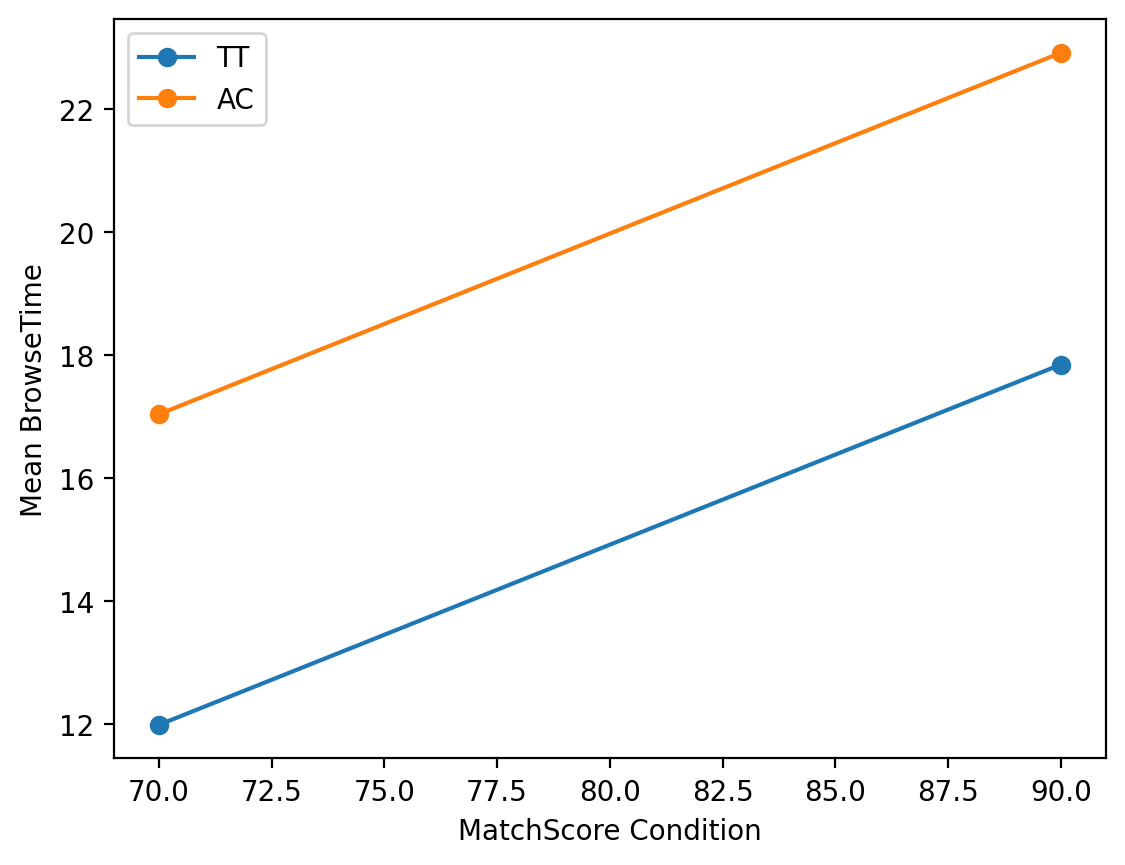

In [86]:
# Condition 1
cond1 = result_2k[result_2k["PrevType"] == 'TT']
y1_mean = [cond1[cond1["MatchScore"] == i]["BrowseTime"].mean() for i in [70,90]]

# Condition 2
cond2 = result_2k[result_2k["PrevType"] == 'AC']
y2_mean = [cond2[cond2["MatchScore"] == i]["BrowseTime"].mean() for i in [70,90]]

# Plotting
fig, ax = plt.subplots()
plt.plot([70,90], [y1_mean[0],y1_mean[1]], label='TT', marker='o')
plt.plot([70,90], [y2_mean[0],y2_mean[1]], label='AC', marker='o')
plt.xlabel("MatchScore Condition")
plt.ylabel("Mean BrowseTime")
plt.legend()
plt.show()

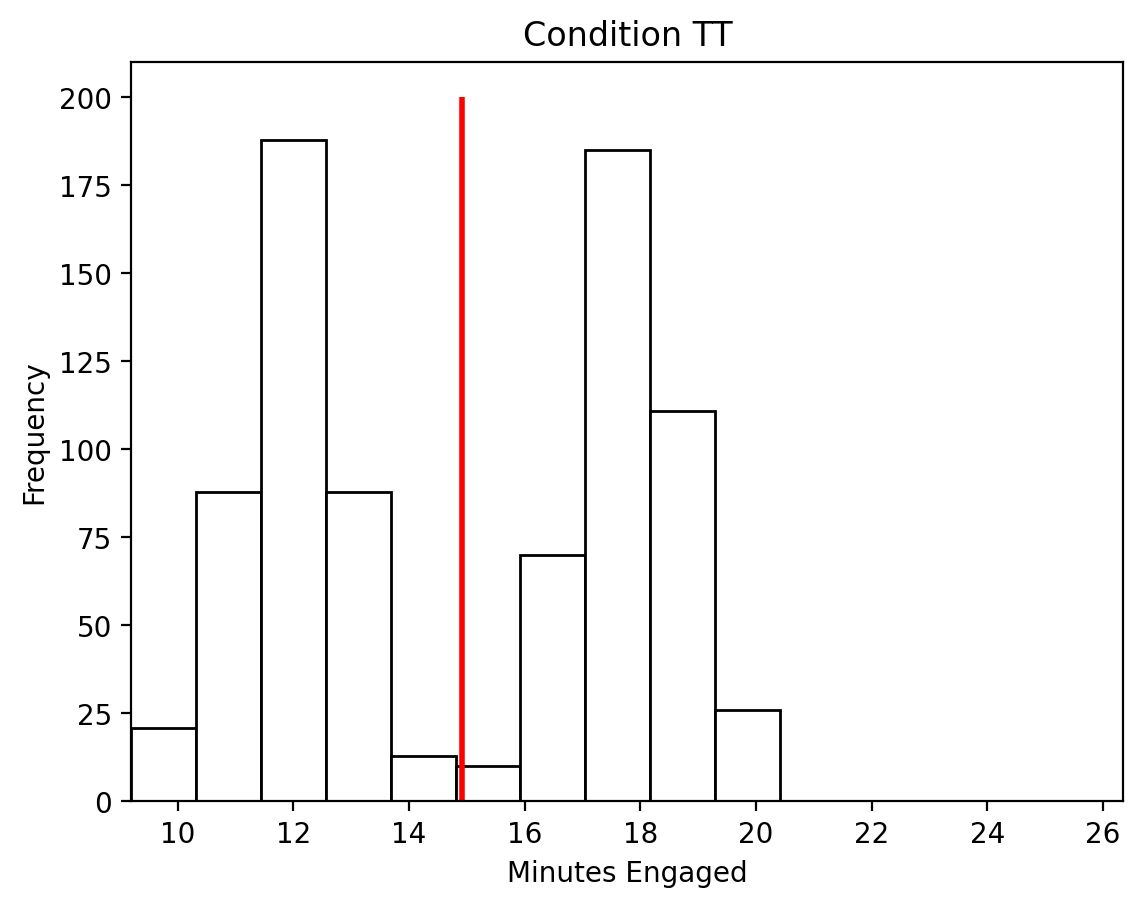

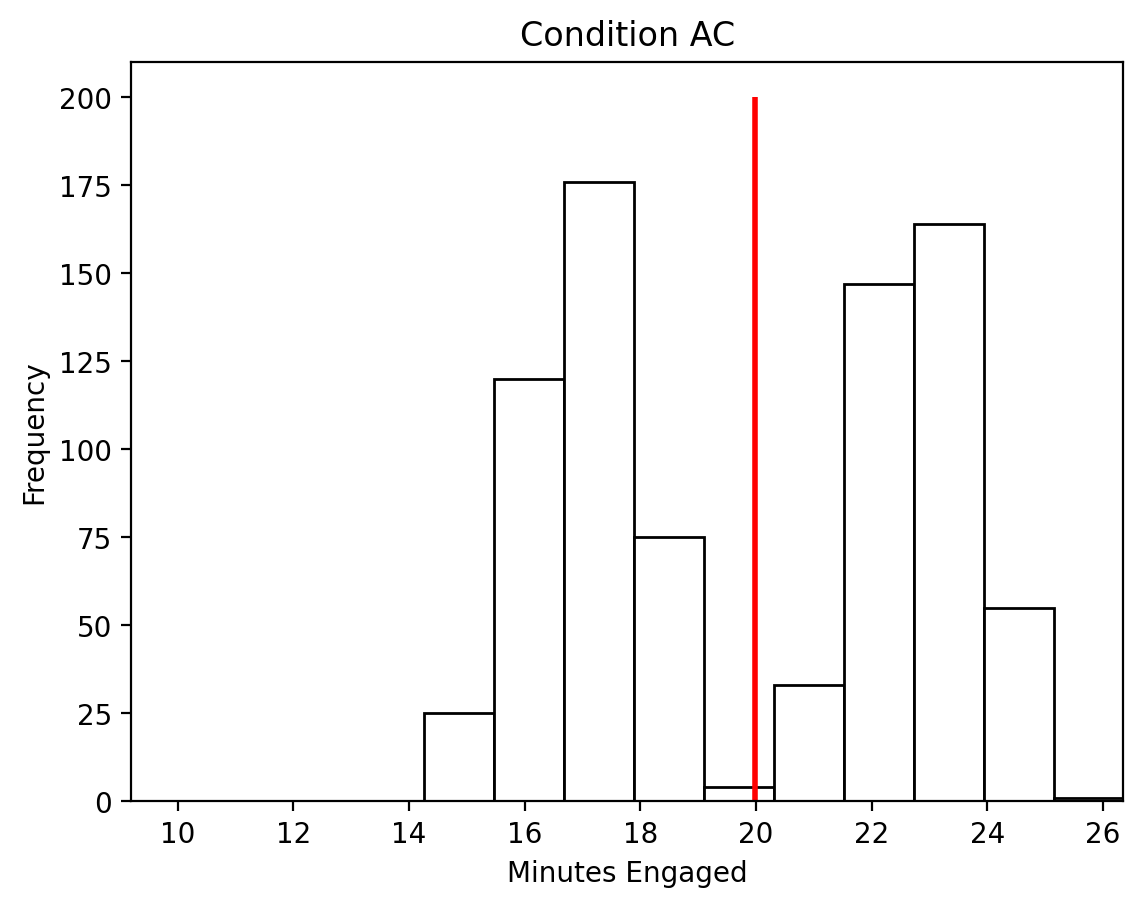

In [87]:
cond1 = result_2k[result_2k["PrevType"]=='TT']["BrowseTime"]
cond2 = result_2k[result_2k["PrevType"]=='AC']["BrowseTime"]
xmin = min(min(cond1), min(cond2))
xmax = max(max(cond1), max(cond2))
plt.figure()
plt.hist(cond1, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("Condition TT")
plt.vlines(x = np.mean(cond1), ymin = 0, ymax = 200, color = "red", linewidth = 2)
plt.figure()
plt.hist(cond2, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("Condition AC")
plt.vlines(x = np.mean(cond2), ymin = 0, ymax = 200, color = "red", linewidth = 2)

In [21]:
result_2k

,TileSize,MatchScore,PrevLength,PrevType,BrowseTime
0,60,70,0.2,AC,17.692254
1,100,90,0.2,AC,23.372251
2,60,70,0.2,AC,16.143046
3,100,90,0.2,AC,22.154946
4,60,70,0.5,AC,17.352033
...,...,...,...,...,...
1595,100,90,0.2,TT,16.092323
1596,60,70,0.5,TT,13.305137
1597,100,90,0.5,TT,18.630773
1598,60,70,0.5,TT,11.724845


In [41]:
result_2 = pd.read_csv('./result/real_test2.csv')
result_2.columns = ['PrevLength','MatchScore','TileSize','PrevType','BrowseTime']
result_2

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,30,60,0.2,TT,15.554236
1,30,70,0.2,TT,14.182131
2,30,90,0.2,TT,17.224777
3,60,60,0.2,TT,13.670492
4,60,90,0.2,TT,10.567550
...,...,...,...,...,...
1095,90,70,0.2,TT,12.294698
1096,90,90,0.2,TT,13.574271
1097,120,60,0.2,TT,17.301849
1098,120,70,0.2,TT,18.159127


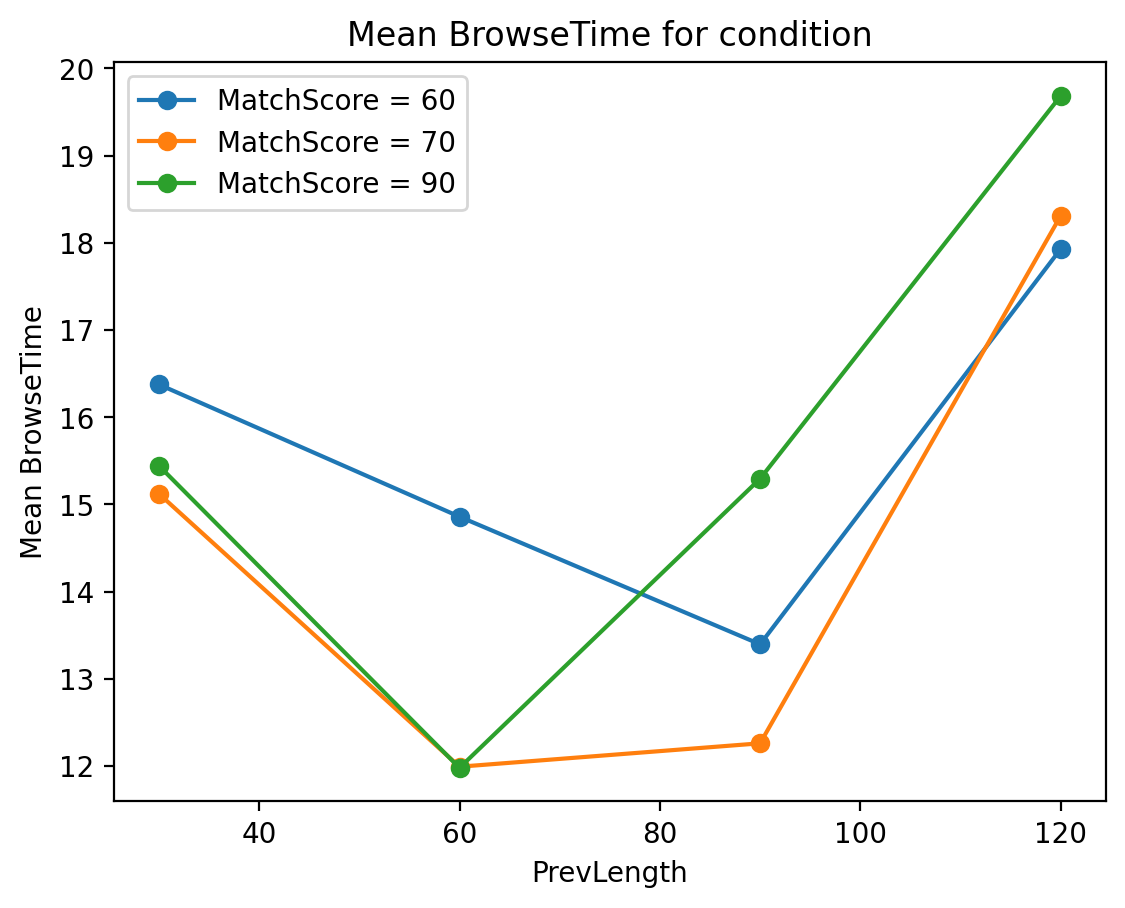

In [90]:
prev = result_2k.loc[
    (result_2k['PrevLength'] == 60) & 
    (result_2k['MatchScore'] == 70) & 
    (result_2k['TileSize'] == 0.2) & 
    (result_2k['PrevType'] == 'TT')
]
result_2 = pd.concat([result_2, prev.head(100)], ignore_index=True)
# Condition 1
cond1 = result_2[result_2["MatchScore"] == 60]
y1_mean = [cond1[cond1["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 2
cond2 = result_2[result_2["MatchScore"] == 70]
y2_mean = [cond2[cond2["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 3
cond3 = result_2[result_2["MatchScore"] == 90]
y3_mean = [cond3[cond3["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Plotting
plt.plot([30,60,90,120], y1_mean, label='MatchScore = 60', marker='o')
plt.plot([30,60,90,120], y2_mean, label='MatchScore = 70', marker='o')
plt.plot([30,60,90,120], y3_mean, label='MatchScore = 90', marker='o')
plt.xlabel("PrevLength")
plt.ylabel("Mean BrowseTime")
plt.title("Mean BrowseTime for condition (Trial)")
plt.legend()
plt.show()

In [150]:
model = smf.ols('BrowseTime ~ C(MatchScore) * C(PrevLength)', data = result_2).fit()

model_red1 = smf.ols('BrowseTime ~ C(MatchScore) + C(PrevLength)', data = result_2).fit()
sm.stats.anova_lm(model_red1, model)

# small p-value -> MatchScore by PrevLength interaction effect is significant

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1694.0,2643.659323,0.0,NaN,NaN,NaN
1,1688.0,1748.541731,6.0,895.117593,144.020821,1.235000e-147


In [152]:
# u60 != u70 != u90
m = 3
y1 = cond1['BrowseTime']
y2 = cond2['BrowseTime']
y3 = cond3['BrowseTime']
n1 = len(cond1)
n2 = len(cond2)
n3 = len(cond3)
N = n1 + n2 + n3
concatenated_df = pd.concat([cond1, cond2, cond3], axis=0, ignore_index=True)
ybar = np.mean(concatenated_df["BrowseTime"])
SSC = n1*(np.mean(y1) - ybar)**2 + n2*(np.mean(y2) - ybar)**2 + n3*(np.mean(y3) - ybar)**2 
SSE = np.sum((y1 - np.mean(y1))**2) + np.sum((y2 - np.mean(y2))**2) + np.sum((y3 - np.mean(y3))**2)
t = (SSC/(m-1)) / (SSE/(N-m))
pv = stats.f.sf(t, dfn = m-1, dfd = N-m)
print("t =", t)
print("p-value =", pv)

t = 237.8769776147725
p-value = 8.542642482688562e-92


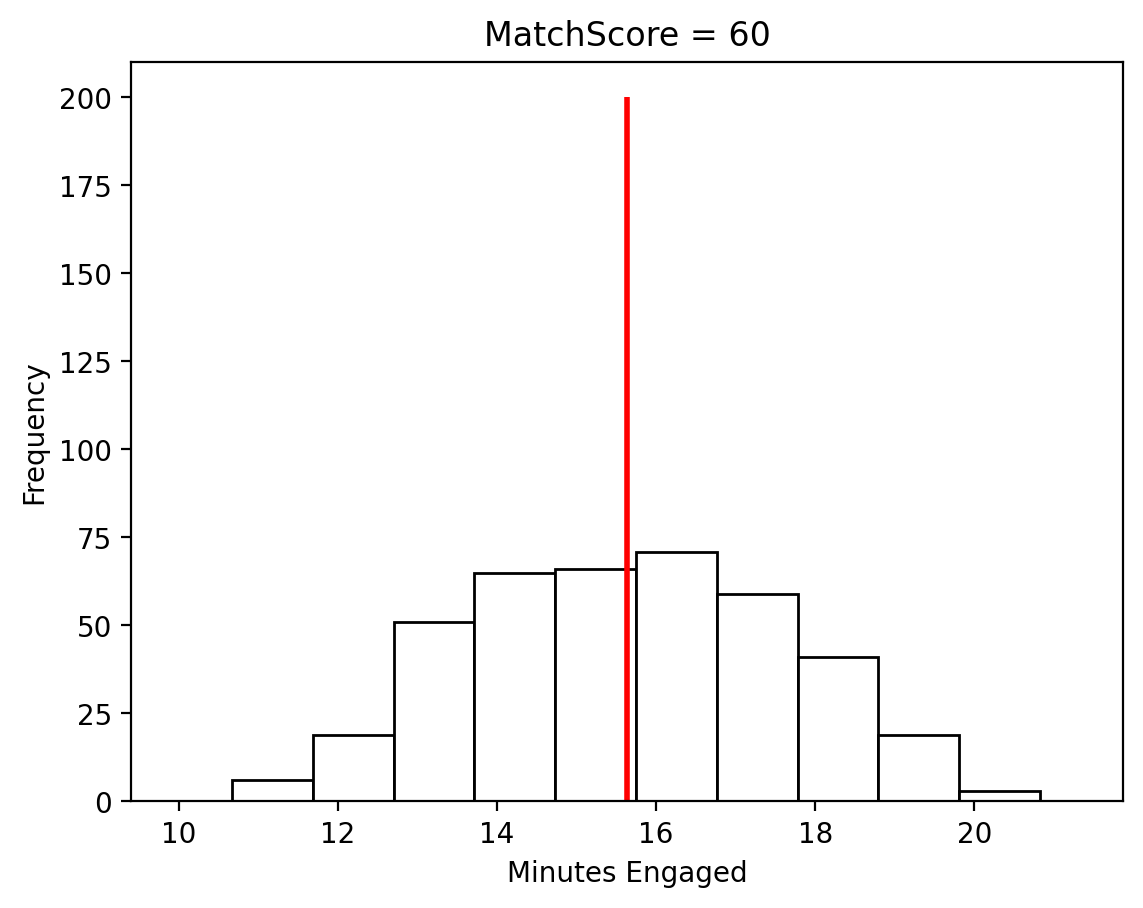

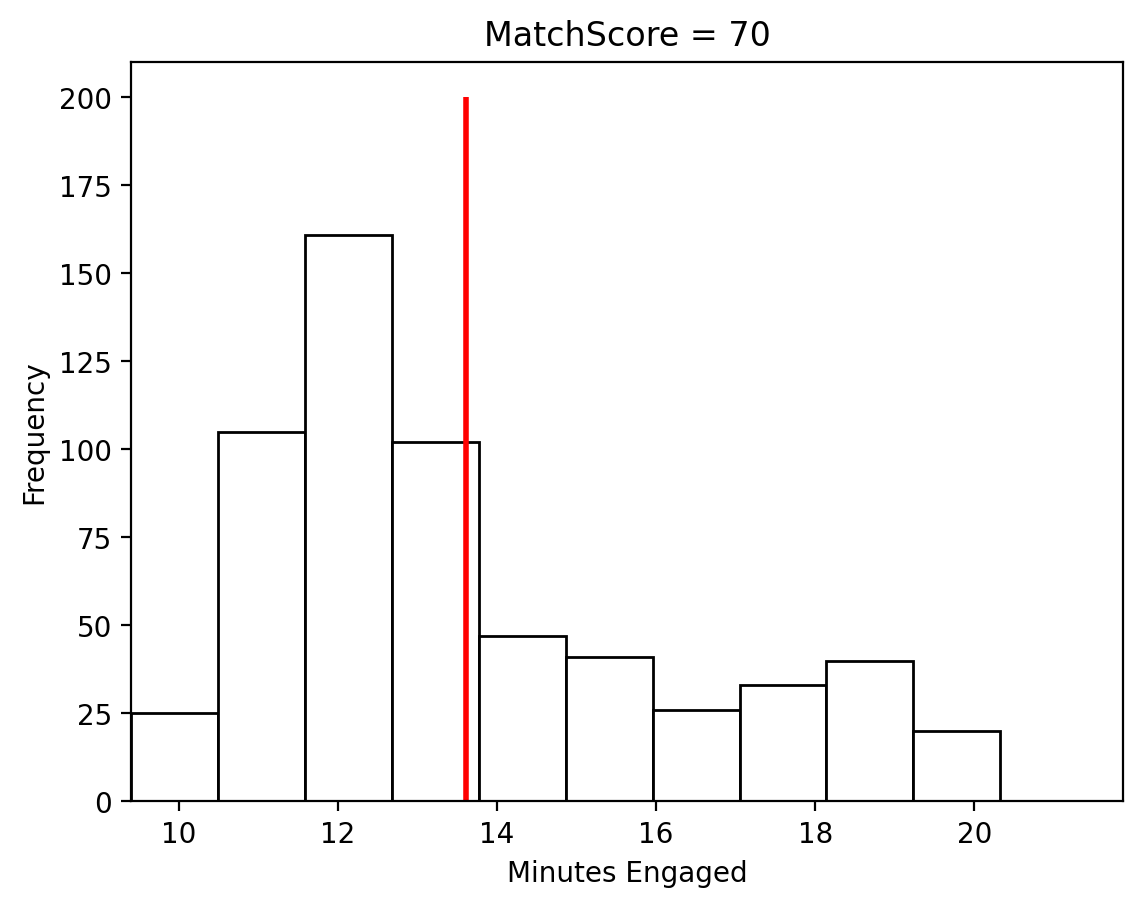

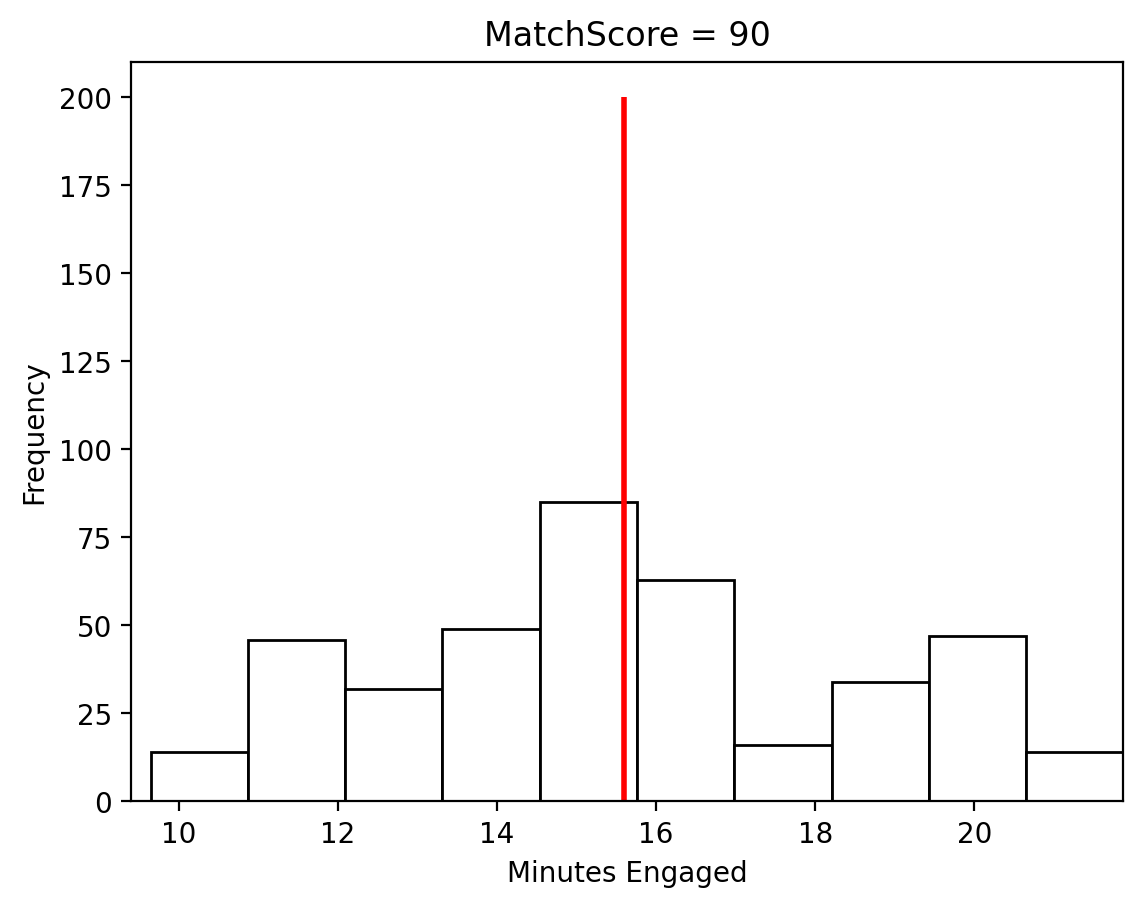

In [54]:
cond1 = result_2[result_2["MatchScore"] == 60]["BrowseTime"]
cond2 = result_2[result_2["MatchScore"] == 70]["BrowseTime"]
cond3 = result_2[result_2["MatchScore"] == 90]["BrowseTime"]
xmin = min(min(cond1), min(cond2), min(cond3))
xmax = max(max(cond1), max(cond2), max(cond3))

plt.figure()
plt.hist(cond1, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("MatchScore = 60")
plt.vlines(x = np.mean(cond1), ymin = 0, ymax = 200, color = "red", linewidth = 2)

plt.figure()
plt.hist(cond2, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("MatchScore = 70")
plt.vlines(x = np.mean(cond2), ymin = 0, ymax = 200, color = "red", linewidth = 2)

plt.figure()
plt.hist(cond3, color = "white", edgecolor = "black")
plt.xlim(xmin,xmax)
plt.xlabel("Minutes Engaged")
plt.ylabel("Frequency")
plt.title("MatchScore = 90")
plt.vlines(x = np.mean(cond3), ymin = 0, ymax = 200, color = "red", linewidth = 2)

In [55]:
result_3 = pd.read_csv('./result/real_test3.csv')
result_3.columns = ['PrevLength','MatchScore','TileSize','PrevType','BrowseTime']
result_3

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,65,85,0.2,TT,11.797616
1,65,77,0.2,TT,11.699288
2,55,85,0.2,TT,11.568841
3,55,77,0.2,TT,11.410275
4,65,85,0.2,TT,12.153627
...,...,...,...,...,...
395,55,77,0.2,TT,13.991007
396,65,85,0.2,TT,10.319153
397,65,77,0.2,TT,10.699549
398,55,85,0.2,TT,12.316210


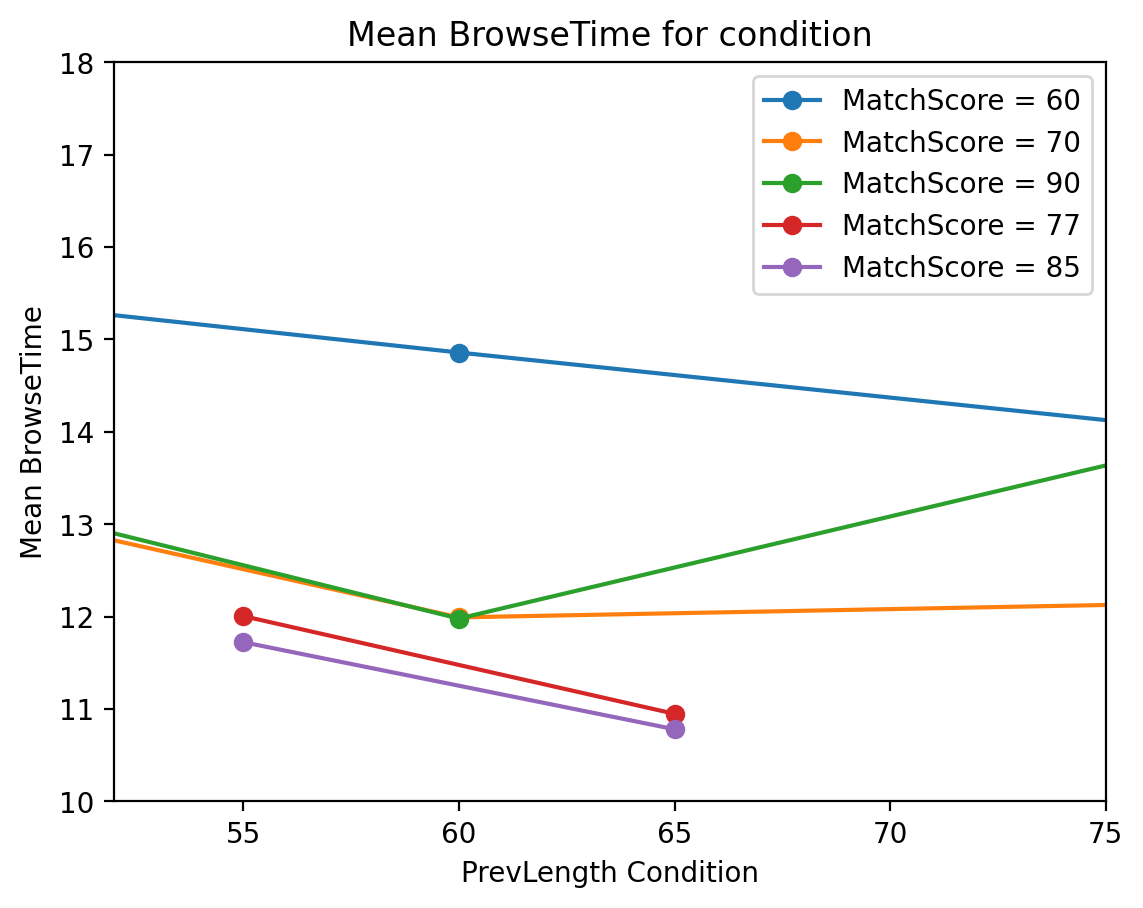

In [141]:
# Condition 1
cond1 = result_2[result_2["MatchScore"] == 60]
y1_mean = [cond1[cond1["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 2
cond2 = result_2[result_2["MatchScore"] == 70]
y2_mean = [cond2[cond2["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 3
cond3 = result_2[result_2["MatchScore"] == 90]
y3_mean = [cond3[cond3["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 4
cond4 = result_3[result_3["MatchScore"] == 77]
y4_mean = [cond4[cond4["PrevLength"] == i]["BrowseTime"].mean() for i in [55,65]]

# Condition 5
cond5 = result_3[result_3["MatchScore"] == 85]
y5_mean = [cond5[cond5["PrevLength"] == i]["BrowseTime"].mean() for i in [55,65]]

# Plotting
plt.plot([30,60,90,120], y1_mean, label='MatchScore = 60', marker='o')
plt.plot([30,60,90,120], y2_mean, label='MatchScore = 70', marker='o')
plt.plot([30,60,90,120], y3_mean, label='MatchScore = 90',marker='o')
plt.plot([55,65], y4_mean, label='MatchScore = 77', marker='o')
plt.plot([55,65], y5_mean, label='MatchScore = 85', marker='o')
plt.xlabel("PrevLength Condition")
plt.ylabel("Mean BrowseTime")
plt.title("Mean BrowseTime for condition")
plt.xlim(52, 75)
plt.ylim(10, 18)
plt.legend()
plt.show()


In [146]:
# H0:u_score85 >= u_score77 vs. Ha:u_score85<u_score77

# f-test
t = np.var(cond5['BrowseTime'], ddof = 1)/np.var(cond4['BrowseTime'], ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=199, dfd=199) + 1 - stats.f.cdf(1/t, dfn=199, dfd=199)
print("p-value =", pv)

t, pv = stats.ttest_ind(cond5['BrowseTime'], cond4['BrowseTime'], equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)


t = 0.9724049398255196
p-value = 0.8437312245135316
t = -2.0086192898622133
p-value = 0.02262625868527355


In [165]:
y5 = result_3[result_3["PrevLength"] == 65]
y6 = result_3[result_3["PrevLength"] == 55]
t = np.var(y5['BrowseTime'], ddof = 1)/np.var(y6['BrowseTime'], ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=199, dfd=199) + 1 - stats.f.cdf(1/t, dfn=199, dfd=199)
print("p-value =", pv)

t, pv = stats.ttest_ind(y5['BrowseTime'], y6['BrowseTime'], equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = 0.9735671610844063
p-value = 0.8503209939489209
t = -9.935004402130444
p-value = 3.1662591336213325e-21


In [164]:
y5 = cond5[cond5["PrevLength"] == 65]
y6 = cond4[cond4["PrevLength"] == 65]
t = np.var(y5['BrowseTime'], ddof = 1)/np.var(y6['BrowseTime'], ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=199, dfd=199) + 1 - stats.f.cdf(1/t, dfn=199, dfd=199)
print("p-value =", pv)

t, pv = stats.ttest_ind(y5['BrowseTime'], y6['BrowseTime'], equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = 0.9680284876751112
p-value = 0.8189484347429872
t = -1.1824024461080613
p-value = 0.11923200720073372


In [78]:
result_4 = pd.read_csv('./result/real_test4.csv')
result_4.columns = ['PrevLength','MatchScore','TileSize','PrevType','BrowseTime']
result_4

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,60,88,0.2,TT,11.835942
1,65,88,0.2,TT,12.639405
2,60,88,0.2,TT,10.435174
3,65,88,0.2,TT,10.024118
4,60,88,0.2,TT,12.851058
...,...,...,...,...,...
195,65,88,0.2,TT,11.597655
196,60,88,0.2,TT,11.246338
197,65,88,0.2,TT,12.179524
198,60,88,0.2,TT,12.038714


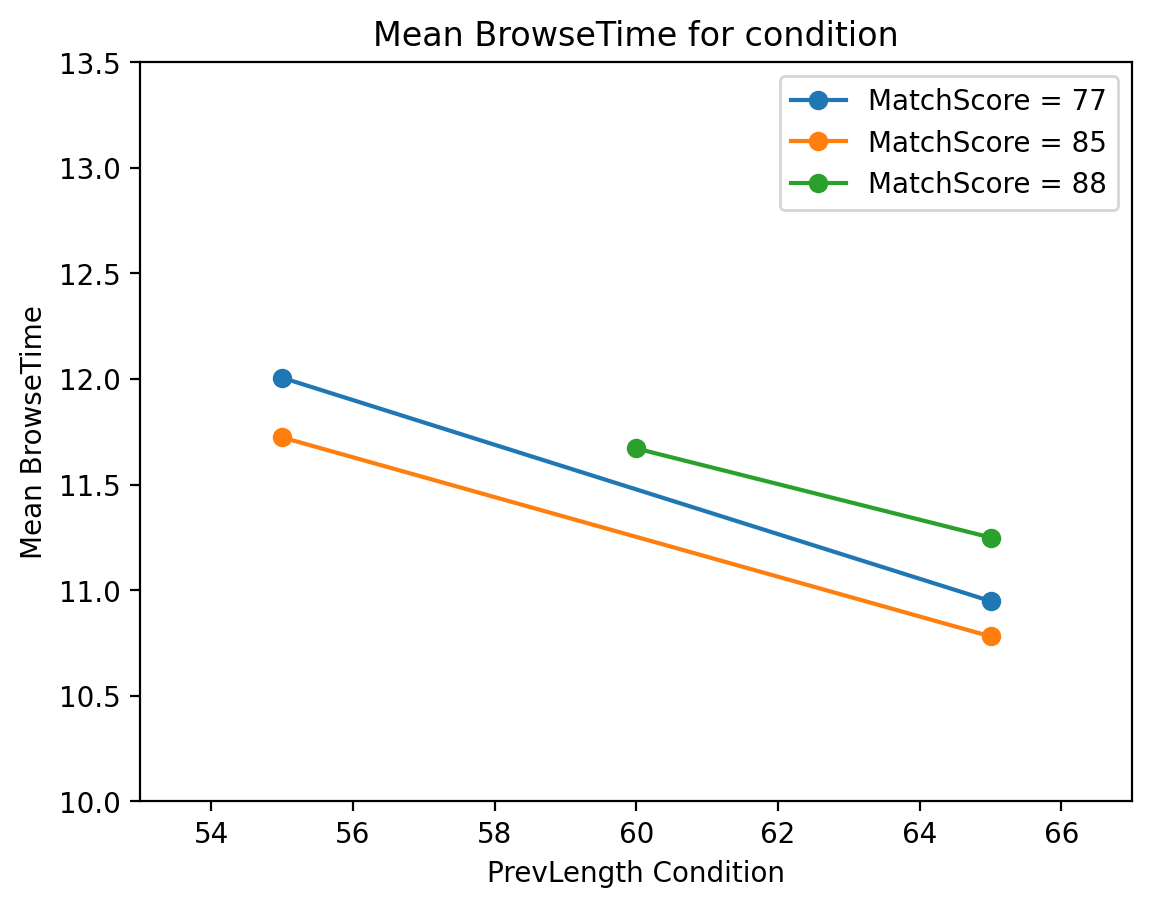

In [109]:
# Condition 1
cond1 = result_2[result_2["MatchScore"] == 60]
y1_mean = [cond1[cond1["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 2
cond2 = result_2[result_2["MatchScore"] == 70]
y2_mean = [cond2[cond2["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 3
cond3 = result_2[result_2["MatchScore"] == 90]
y3_mean = [cond3[cond3["PrevLength"] == i]["BrowseTime"].mean() for i in [30,60,90,120]]

# Condition 4
cond4 = result_3[result_3["MatchScore"] == 77]
y4_mean = [cond4[cond4["PrevLength"] == i]["BrowseTime"].mean() for i in [55,65]]

# Condition 5
cond5 = result_3[result_3["MatchScore"] == 85]
y5_mean = [cond5[cond5["PrevLength"] == i]["BrowseTime"].mean() for i in [55,65]]

# Condition 6
cond6 = result_4[result_4["MatchScore"] == 88]
y6_mean = [cond6[cond6["PrevLength"] == i]["BrowseTime"].mean() for i in [60,65]]

# Plotting
# plt.plot([30,60,90,120], y1_mean, label='MatchScore = 60')
# plt.plot([30,60,90,120], y2_mean, label='MatchScore = 70')
# plt.plot([30,60,90,120], y3_mean, label='MatchScore = 90')
plt.plot([55,65], y4_mean, label='MatchScore = 77', marker='o')
plt.plot([55,65], y5_mean, label='MatchScore = 85', marker='o')
plt.plot([60,65], y6_mean, label='MatchScore = 88', marker='o')
plt.xlabel("PrevLength Condition")
plt.ylabel("Mean BrowseTime")
plt.title("Mean BrowseTime for condition")
plt.xlim(53, 67)
plt.ylim(10, 13.5)
plt.legend()
plt.show()

In [ ]:
# h0:u_score85>=u_score88 vs. ha: u_score85<u_score88

# f-test
t = np.var(cond1, ddof = 1)/np.var(cond2, ddof = 1)
print("t =", t)

In [76]:
result_5 = pd.read_csv('./result/real_test5.csv')
result_5.columns = ['PrevLength','MatchScore','TileSize','PrevType','BrowseTime']
result_5

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,60,85,0.2,TT,11.545139
1,65,85,0.2,TT,10.351725
2,60,85,0.2,TT,10.704909
3,65,85,0.2,TT,10.805823
4,60,85,0.2,TT,10.372603
...,...,...,...,...,...
195,65,85,0.2,TT,10.460810
196,60,85,0.2,TT,10.480912
197,65,85,0.2,TT,10.561716
198,60,85,0.2,TT,10.440178


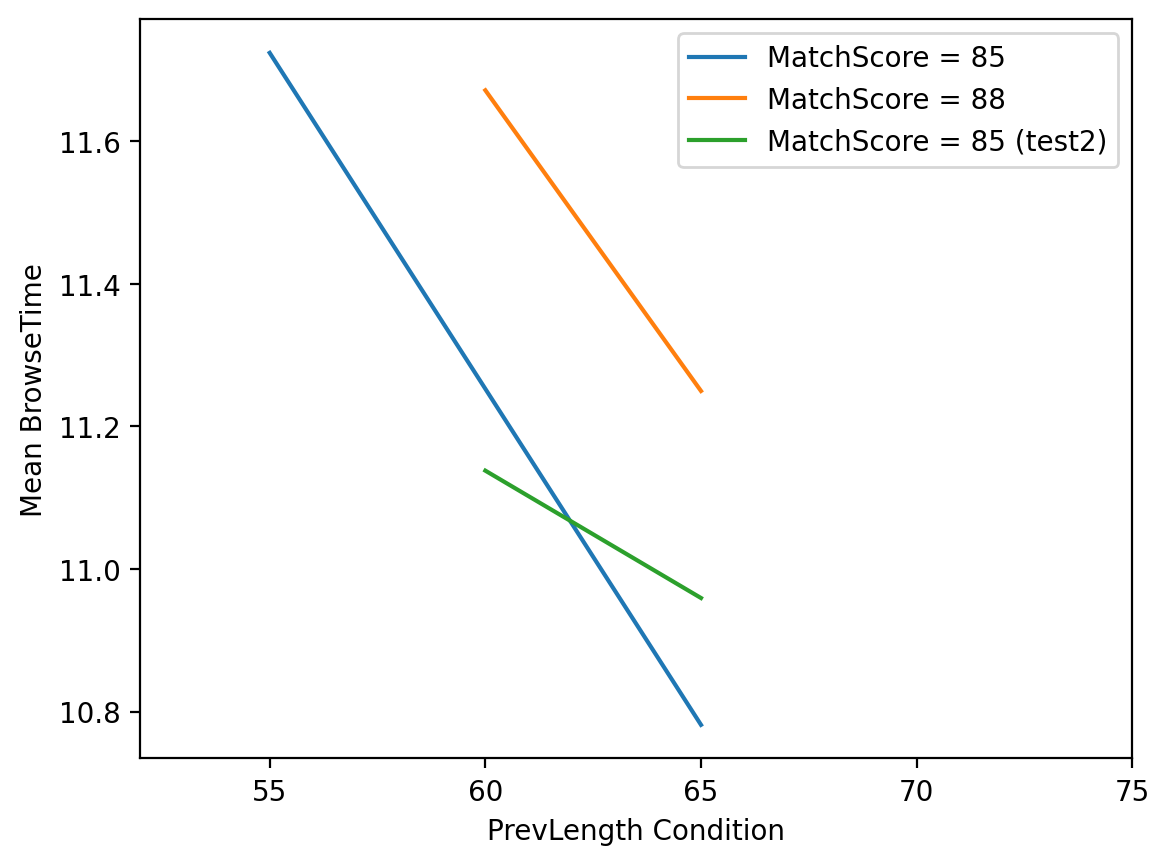

In [77]:
# Condition 5
cond5 = result_3[result_3["MatchScore"] == 85]
y5_mean = [cond5[cond5["PrevLength"] == i]["BrowseTime"].mean() for i in [55,65]]

# Condition 6
cond6 = result_4[result_4["MatchScore"] == 88]
y6_mean = [cond6[cond6["PrevLength"] == i]["BrowseTime"].mean() for i in [60,65]]

cond7 = result_5[result_5["MatchScore"] == 85]
y7_mean = [cond7[cond7["PrevLength"] == i]["BrowseTime"].mean() for i in [60,65]]

# Plotting
plt.plot([55,65], y5_mean, label='MatchScore = 85')
plt.plot([60,65], y6_mean, label='MatchScore = 88')
plt.plot([60,65], y7_mean, label='MatchScore = 85 (test2)')
plt.xlabel("PrevLength Condition")
plt.ylabel("Mean BrowseTime")
plt.xlim(52, 75)
plt.legend()
plt.show()

In [75]:
result_6 = pd.read_csv('./result/real_test6.csv')
result_6.columns = ['PrevLength','MatchScore','TileSize','PrevType','BrowseTime']
result_6

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,70,85,0.2,TT,8.963663
1,70,85,0.2,TT,11.213131
2,70,85,0.2,TT,10.843522
3,70,85,0.2,TT,12.371175
4,70,85,0.2,TT,12.397577
...,...,...,...,...,...
95,70,85,0.2,TT,10.391354
96,70,85,0.2,TT,13.101740
97,70,85,0.2,TT,11.816595
98,70,85,0.2,TT,12.488777


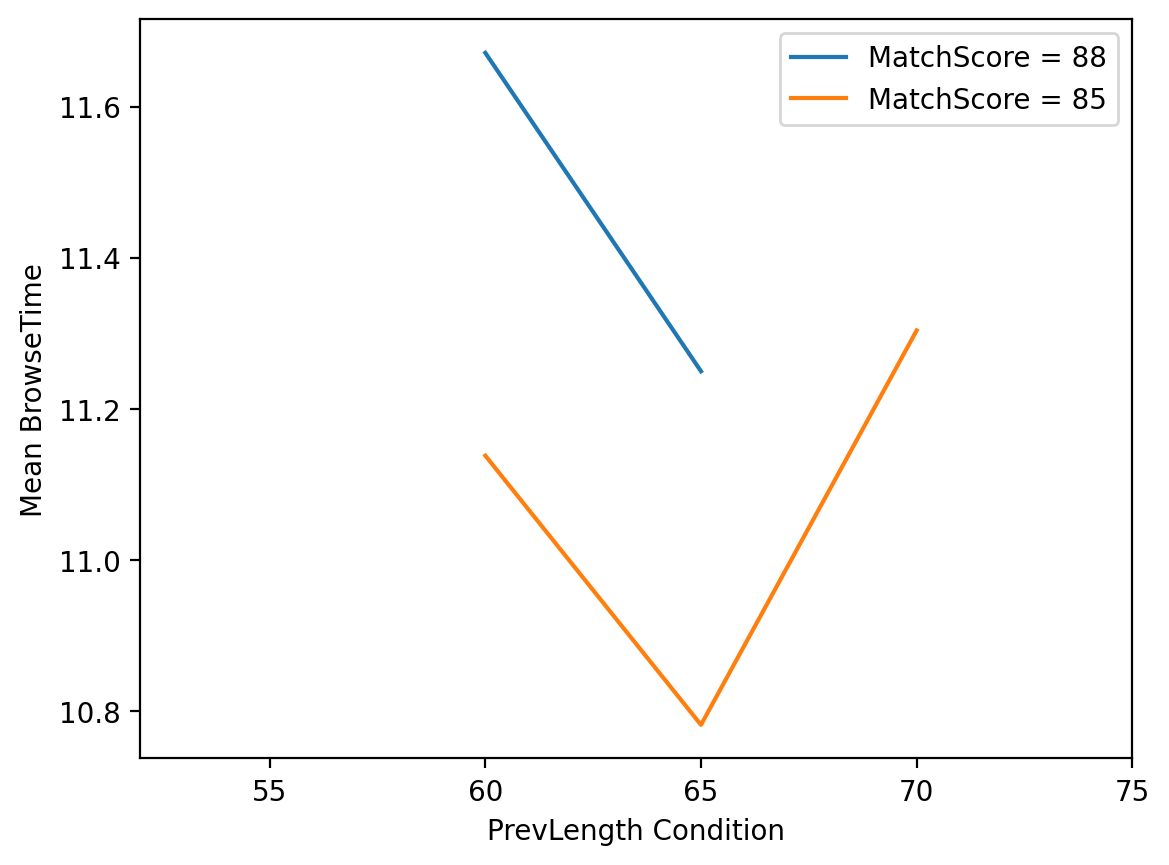

In [128]:
# Condition 5
cond5 = result_3[result_3["MatchScore"] == 85]
l65 = cond5[cond5["PrevLength"] == 65]
cond7 = result_5[result_5["MatchScore"] == 85]
l60 = cond7[cond7["PrevLength"] == 60]
merged = pd.concat([l65, l60], ignore_index=True)
result_85score = pd.concat([merged, result_6], ignore_index=True)

# Condition 5
cond5 = result_3[result_3["MatchScore"] == 85]
y5_mean = [cond5[cond5["PrevLength"] == i]["BrowseTime"].mean() for i in [55,65]]

# Condition 6
cond6 = result_4[result_4["MatchScore"] == 88]
y6_mean = [cond6[cond6["PrevLength"] == i]["BrowseTime"].mean() for i in [60,65]]

cond7 = result_85score[result_85score["MatchScore"] == 85]
y7_mean = [cond7[cond7["PrevLength"] == i]["BrowseTime"].mean() for i in [60,65,70]]

# Plotting
# plt.plot([55,65], y5_mean, label='MatchScore = 85')
plt.plot([60,65], y6_mean, label='MatchScore = 88')
plt.plot([60,65,70], y7_mean, label='MatchScore = 85')
plt.xlabel("PrevLength Condition")
plt.ylabel("Mean BrowseTime")
plt.xlim(52, 75)
plt.legend()
plt.show()

In [129]:
result_85score

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,65,85,0.2,TT,11.797616
1,65,85,0.2,TT,12.153627
2,65,85,0.2,TT,11.234864
3,65,85,0.2,TT,11.516001
4,65,85,0.2,TT,11.016357
...,...,...,...,...,...
295,70,85,0.2,TT,10.391354
296,70,85,0.2,TT,13.101740
297,70,85,0.2,TT,11.816595
298,70,85,0.2,TT,12.488777


Text(0.5, 1.0, 'Match Score = 85')

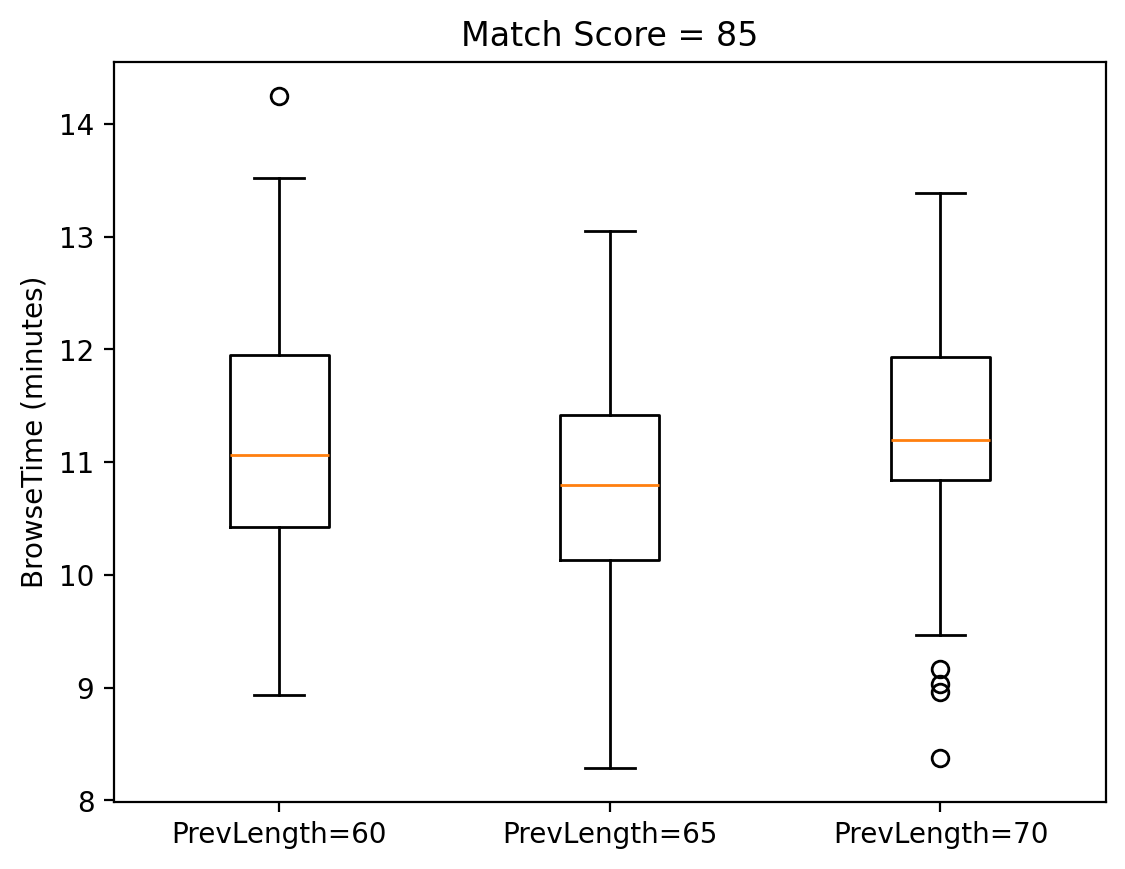

In [130]:
y1 = result_85score[result_85score["PrevLength"]==60]["BrowseTime"]
y2 = result_85score[result_85score["PrevLength"]==65]["BrowseTime"]
y3 = result_85score[result_85score["PrevLength"]==70]["BrowseTime"]
y = [y1, y2, y3]
plt.boxplot(y, labels = ["PrevLength=60", "PrevLength=65", "PrevLength=70"]);
plt.ylabel("BrowseTime (minutes)");
# plt.xlabel("Condition");
plt.title('Match Score = 85')

In [131]:
model = smf.ols('BrowseTime ~ C(PrevLength)', data = result_85score).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     7.072
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           0.000999
Time:                        10:59:33   Log-Likelihood:                -425.21
No. Observations:                 300   AIC:                             856.4
Df Residuals:                     297   BIC:                             867.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.1379      0.100    110.994      0.000      10.940      11.335
C(PrevLength)[T.65]    -0.3565      0.142     -2.512      0.013      -0.636      -0.077
C(PrevLength)[T.70]     0.1658      0.142      1.168      0.244      -0.113       0.445
==============================================================================
Omnibus:                        0.606   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.574
Skew:                          -0.107   Prob(JB):                        0.751
Kurtosis:                       2.978   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
m = 3
n1 = len(y1)
n2 = len(y2)
n3 = len(y3)
N = n1 + n2 + n3
ybar = np.mean(result_85score["BrowseTime"])
SSC = n1*(np.mean(y1) - ybar)**2 + n2*(np.mean(y2) - ybar)**2 + n3*(np.mean(y3) - ybar)**2 
SSE = np.sum((y1 - np.mean(y1))**2) + np.sum((y2 - np.mean(y2))**2) + np.sum((y3 - np.mean(y3))**2)
t = (SSC/(m-1)) / (SSE/(N-m))
pv = stats.f.sf(t, dfn = m-1, dfd = N-m)
print("t =", t)
print("p-value =", pv)

t = 7.072380957951378
p-value = 0.0009986248101982037


In [134]:
# h0: u65>=u70 vs. ha: u65<u70

# f-test -> same var
t = np.var(y2, ddof = 1)/np.var(y3, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=499, dfd=499) + 1 - stats.f.cdf(1/t, dfn=499, dfd=499)
print("p-value =", pv)


t = 1.109711159596168
p-value = 1.7547084149799663


In [136]:
# h0: u65>=u70 vs. ha: u65<u70
t, pv = stats.ttest_ind(y2, y3, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -3.75772970639376
p-value = 0.00011275899072370233


In [137]:
# h0: u65>=u60 vs. ha: u65<u60

# f-test -> same var
t = np.var(y2, ddof = 1)/np.var(y1, ddof = 1)
print("t =", t)
pv = stats.f.cdf(t, dfn=499, dfd=499) + 1 - stats.f.cdf(1/t, dfn=499, dfd=499)
print("p-value =", pv)

t = 0.9011353912705603
p-value = 0.2452915850200338


In [138]:
# h0: u65>=u70 vs. ha: u65<u70
t, pv = stats.ttest_ind(y2, y1, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", pv)

t = -2.477009872025716
p-value = 0.007043400291291781
